In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm import tqdm_notebook as tqdm
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
rcParams['font.family'] ='AppleGothic'

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://www.amazon.com/-/ko/product-reviews/B07V461WS4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
time.sleep(1)

In [3]:
name_list = []
score_list = []
date_list = []
style_list = []
review_list = []

while True:
    try:
        star = bs(driver.page_source, "html.parser")
        score = star.find_all("i",{'data-hook':"review-star-rating"})
        date = driver.find_elements_by_css_selector('span.a-size-base.a-color-secondary.review-date')
        style = driver.find_elements_by_css_selector('a.a-size-mini.a-link-normal.a-color-secondary')
        review = driver.find_elements_by_css_selector("div.a-row.a-spacing-small.review-data")
        #time.sleep(1)
        for i in score:
            score_list.append(i.text)
        for i in date:
            date_list.append(i.text)
        for i in style:
            style_list.append(i.text)
        for i in review:
            review_list.append(i.text)
        #time.sleep(1)
        btn = driver.find_element_by_css_selector('#cm_cr-pagination_bar > ul > li.a-last')
        btn.click()
        time.sleep(2)
    except:
        break

In [4]:
len(score_list),len(date_list),len(style_list),len(review_list)

(580, 717, 597, 597)

In [5]:
Coffee1 = {'Star': score_list}

In [6]:
Coffee2 = {'Date': date_list}

In [7]:
Coffee3 = {'Style': style_list, 'Review': review_list}

In [8]:
coffee1 = pd.DataFrame(Coffee1)
coffee2 = pd.DataFrame(Coffee2)
coffee3 = pd.DataFrame(Coffee3)

In [9]:
coffee = pd.concat([coffee1, coffee2, coffee3],axis=1)
coffee.to_csv('coffee.csv')

In [10]:
date = pd.read_csv('coffee.csv',encoding='utf-8')
cafe = date.head(580)

In [11]:
cafe.to_csv('homecafe2.csv')

In [12]:
homecafe2 = pd.read_csv('homecafe2.csv', encoding='utf-8')
homecafe2

,Unnamed: 0.1,Unnamed: 0,Star,Date,Style,Review
0,0,0,별 5개 중 4.0,미국에서 2022년 9월 16일에 검토됨,스타일: Genio 2,I used to own a Dolce gusto Circolo (beautiful...
1,1,1,별 5개 중 5.0,미국에서 2021년 1월 3일에 검토됨,스타일: Genio 2,"We had one of Dolce Gusto machines since 2012,..."
2,2,2,별 5개 중 3.0,미국에서 2022년 9월 16일에 검토됨,스타일: Genio 2,PROS\n- Doesn't take up much space\n- Easy to ...
3,3,3,별 5개 중 5.0,미국에서 2022년 9월 22일에 검토됨,스타일: Genio 2,"I already have an espresso machine, but bought..."
4,4,4,별 5개 중 4.0,미국에서 2021년 1월 3일에 검토됨,스타일: Genio 2,Trying desperately to ween myself off of expen...
...,...,...,...,...,...,...
575,575,575,별 5개 중 5.0,미국에서 2020년 1월 25일에 검토됨,스타일: Genio 2,Good
576,576,576,별 5개 중 5.0,미국에서 2022년 9월 16일에 검토됨,스타일: Genio 2,This is the BEST espresso machine ever! I have...
577,577,577,별 5개 중 5.0,미국에서 2021년 1월 3일에 검토됨,스타일: Genio 2,Love it
578,578,578,별 5개 중 5.0,미국에서 2020년 1월 18일에 검토됨,스타일: Genio 2,Good


In [13]:
homecafe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  580 non-null    int64 
 1   Unnamed: 0    580 non-null    int64 
 2   Star          580 non-null    object
 3   Date          580 non-null    object
 4   Style         580 non-null    object
 5   Review        575 non-null    object
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [14]:
import nltk
from nltk import pos_tag
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pickle
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82104\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
review_list[0]

'I used to own a Dolce gusto Circolo (beautiful machine) since 2008 probably, for years I thought the machine would quit on me soon so I was conservative ordering pods, but it lasted me almost a decade and half. So now we had to decide which way to go in terms of a replacement machine, you would think after so long there would be lots more options for espresso drinks with the ease of single cup, not really! This system still won out for us in terms of ease and speed of making a cup even if everyone in the family had a different order. Ease of cleanup! This is a big differentiator for me, sure you can barista your own cappuccino with other machines and then you can spend time cleaning up everything, nope! The price for the machine is decent, doesn’t break the bank, quality wise it isn’t as sturdy or elegant as the circolo but it isn’t as expensive either. I hate the red cord! Like nobody was thinking camouflage while designing this thing… I like the dispense auto stop feature compared t

In [16]:
review_list_nltk = ''
for i in review_list:
    review_list_nltk = review_list_nltk + i

In [17]:
review_list_nltk

'I used to own a Dolce gusto Circolo (beautiful machine) since 2008 probably, for years I thought the machine would quit on me soon so I was conservative ordering pods, but it lasted me almost a decade and half. So now we had to decide which way to go in terms of a replacement machine, you would think after so long there would be lots more options for espresso drinks with the ease of single cup, not really! This system still won out for us in terms of ease and speed of making a cup even if everyone in the family had a different order. Ease of cleanup! This is a big differentiator for me, sure you can barista your own cappuccino with other machines and then you can spend time cleaning up everything, nope! The price for the machine is decent, doesn’t break the bank, quality wise it isn’t as sturdy or elegant as the circolo but it isn’t as expensive either. I hate the red cord! Like nobody was thinking camouflage while designing this thing… I like the dispense auto stop feature compared t

In [18]:
nltk.corpus.stopwords.words('english')
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
stopwords = ['i', 'be','see','lol.i','see','beans.i',
            'have','want','joe','look','bit','continue','winner.this',
            '”','t','bulletproof','say','“','do','me.i','coffee','try','use',
            '%','way','maker','cup','water','get','love','keurig','work',
            'day','amazon','box','year','pod','return','thing']

In [20]:
def extract_tags_english(string):
    word_list = []
    string = string.lower()
    string = nltk.word_tokenize(string)
    string = nltk.pos_tag(string)
       
    for word, tag in string:
        if tag in ['NN', 'VB']:
            if word not in stopwords: #if word not in stopwords:
                word_list.append(word)

    return word_list

In [21]:
review_list_nltk_update = extract_tags_english(review_list_nltk)
review_list_nltk_update

['own',
 'dolce',
 'gusto',
 'circolo',
 'machine',
 'machine',
 'quit',
 'ordering',
 'decade',
 'half',
 'decide',
 'go',
 'replacement',
 'machine',
 'think',
 'ease',
 'system',
 'ease',
 'speed',
 'everyone',
 'family',
 'order',
 'ease',
 'cleanup',
 'differentiator',
 'barista',
 'cappuccino',
 'spend',
 'time',
 'everything',
 'nope',
 'price',
 'machine',
 'break',
 'bank',
 'quality',
 'wise',
 'sturdy',
 'circolo',
 'either',
 'cord',
 'nobody',
 'camouflage',
 'thing…',
 'auto',
 'stop',
 'feature',
 'give',
 'measure',
 'taste',
 'beef',
 'product',
 'price',
 'availability',
 'pandemic',
 'turn',
 'subscribe',
 'save',
 'price',
 'seller',
 'consistency',
 'machine',
 'pricing',
 'availability',
 'stabilizes',
 'gusto',
 'machine',
 'caramel',
 'macchiato',
 'au',
 'lait.we',
 'dolce',
 'gusto',
 'nothing',
 'version',
 'bulky',
 'volume',
 'liquid',
 'take',
 'space',
 'easy',
 'machine',
 'easy',
 'follow',
 'switch',
 'start',
 'issue',
 'issue',
 'update',
 'machine',

In [22]:
count = Counter(review_list_nltk_update)
count

Counter({'own': 1,
         'dolce': 57,
         'gusto': 66,
         'circolo': 8,
         'machine': 384,
         'quit': 5,
         'ordering': 1,
         'decade': 1,
         'half': 5,
         'decide': 2,
         'go': 19,
         'replacement': 13,
         'think': 3,
         'ease': 5,
         'system': 7,
         'speed': 2,
         'everyone': 6,
         'family': 9,
         'order': 14,
         'cleanup': 3,
         'differentiator': 1,
         'barista': 4,
         'cappuccino': 50,
         'spend': 5,
         'time': 37,
         'everything': 16,
         'nope': 1,
         'price': 30,
         'break': 5,
         'bank': 2,
         'quality': 29,
         'wise': 2,
         'sturdy': 2,
         'either': 1,
         'cord': 37,
         'nobody': 3,
         'camouflage': 1,
         'thing…': 1,
         'auto': 1,
         'stop': 12,
         'feature': 3,
         'give': 10,
         'measure': 3,
         'taste': 49,
         'beef': 1

In [23]:
count.most_common(10)

[('machine', 384),
 ('make', 83),
 ('gusto', 66),
 ('milk', 60),
 ('dolce', 57),
 ('cappuccino', 50),
 ('product', 50),
 ('taste', 49),
 ('espresso', 49),
 ('flavor', 48)]

In [24]:
from PIL import Image
import numpy as np

In [25]:
mask_image = np.array(Image.open(r"C:\Users\82104\Desktop\image\커피잔.jpg"))
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [26]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts\gulim.ttc',
                     width = 700,height=700
                      ,background_color='white',colormap = 'spring'
                      ,mask = mask_image
                      ,random_state=1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


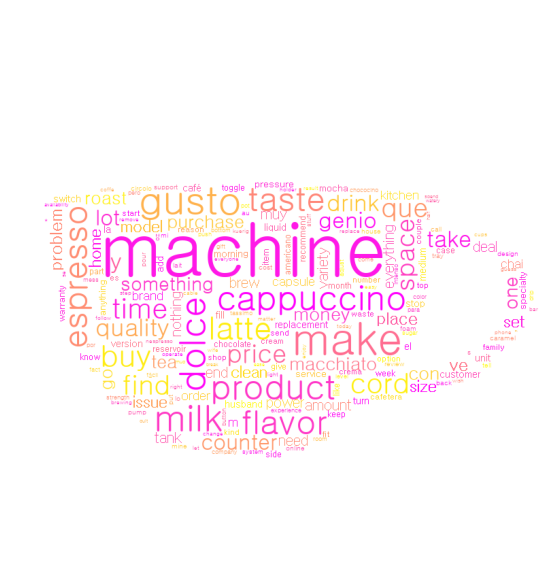

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(" ", size = 30)
plt.show

In [28]:
cafe1 = pd.read_csv("homecafe2.csv", encoding = 'utf-8')
cafe1['Star'] = cafe1['Star'].str.extract(r'(\d+.\d+)')
cafe1

,Unnamed: 0.1,Unnamed: 0,Star,Date,Style,Review
0,0,0,4.0,미국에서 2022년 9월 16일에 검토됨,스타일: Genio 2,I used to own a Dolce gusto Circolo (beautiful...
1,1,1,5.0,미국에서 2021년 1월 3일에 검토됨,스타일: Genio 2,"We had one of Dolce Gusto machines since 2012,..."
2,2,2,3.0,미국에서 2022년 9월 16일에 검토됨,스타일: Genio 2,PROS\n- Doesn't take up much space\n- Easy to ...
3,3,3,5.0,미국에서 2022년 9월 22일에 검토됨,스타일: Genio 2,"I already have an espresso machine, but bought..."
4,4,4,4.0,미국에서 2021년 1월 3일에 검토됨,스타일: Genio 2,Trying desperately to ween myself off of expen...
...,...,...,...,...,...,...
575,575,575,5.0,미국에서 2020년 1월 25일에 검토됨,스타일: Genio 2,Good
576,576,576,5.0,미국에서 2022년 9월 16일에 검토됨,스타일: Genio 2,This is the BEST espresso machine ever! I have...
577,577,577,5.0,미국에서 2021년 1월 3일에 검토됨,스타일: Genio 2,Love it
578,578,578,5.0,미국에서 2020년 1월 18일에 검토됨,스타일: Genio 2,Good


In [51]:
homecafe2 = cafe1['Style'].str.split("색상:", expand = True)
homecafe2[0] = homecafe2[0].str.replace("스타일: ", "")
#homecafe2.rename(columns={0: "Style", 1: "Color"}, inplace=True)
homecafe2.rename(columns={0: "Style"}, inplace=True)
homecafe2

,Style
0,Genio 2
1,Genio 2
2,Genio 2
3,Genio 2
4,Genio 2
...,...
575,Genio 2
576,Genio 2
577,Genio 2
578,Genio 2


In [53]:
ymd = cafe1['Date'].str.replace("\w*에서", "")
ymd = ymd.str.replace("Reviewed in the \w* \w* on ", "")
ymd = ymd.str.replace("년 ", "-")
ymd = ymd.str.replace("월 ", "-")
ymd = ymd.str.replace("일", "")
ymd = ymd.str.replace("에 검토됨", "")
ymdf = pd.to_datetime(ymd)
ymdf

0     2022-09-16
1     2021-01-03
2     2022-09-16
3     2022-09-22
4     2021-01-03
         ...    
575   2020-01-25
576   2022-09-16
577   2021-01-03
578   2020-01-18
579   2020-09-18
Name: Date, Length: 580, dtype: datetime64[ns]

In [54]:
homecafe2['Star'] = cafe1['Star']

In [55]:
homecafe2 = homecafe2[['Star','Style']]

In [56]:
homecafe2['Review'] = cafe1['Review']

In [57]:
homecafe2['Date'] = ymdf
homecafe2

,Star,Style,Review,Date
0,4.0,Genio 2,I used to own a Dolce gusto Circolo (beautiful...,2022-09-16
1,5.0,Genio 2,"We had one of Dolce Gusto machines since 2012,...",2021-01-03
2,3.0,Genio 2,PROS\n- Doesn't take up much space\n- Easy to ...,2022-09-16
3,5.0,Genio 2,"I already have an espresso machine, but bought...",2022-09-22
4,4.0,Genio 2,Trying desperately to ween myself off of expen...,2021-01-03
...,...,...,...,...
575,5.0,Genio 2,Good,2020-01-25
576,5.0,Genio 2,This is the BEST espresso machine ever! I have...,2022-09-16
577,5.0,Genio 2,Love it,2021-01-03
578,5.0,Genio 2,Good,2020-01-18


In [59]:
homecafe2 = homecafe2[['Star','Date','Style','Review']]
homecafe2

,Star,Date,Style,Review
0,4.0,2022-09-16,Genio 2,I used to own a Dolce gusto Circolo (beautiful...
1,5.0,2021-01-03,Genio 2,"We had one of Dolce Gusto machines since 2012,..."
2,3.0,2022-09-16,Genio 2,PROS\n- Doesn't take up much space\n- Easy to ...
3,5.0,2022-09-22,Genio 2,"I already have an espresso machine, but bought..."
4,4.0,2021-01-03,Genio 2,Trying desperately to ween myself off of expen...
...,...,...,...,...
575,5.0,2020-01-25,Genio 2,Good
576,5.0,2022-09-16,Genio 2,This is the BEST espresso machine ever! I have...
577,5.0,2021-01-03,Genio 2,Love it
578,5.0,2020-01-18,Genio 2,Good


In [60]:
homecafe2 = pd.DataFrame(homecafe2)

In [61]:
homecafe2 = homecafe2.astype({'Star':'float'})
homecafe2

,Star,Date,Style,Review
0,4.0,2022-09-16,Genio 2,I used to own a Dolce gusto Circolo (beautiful...
1,5.0,2021-01-03,Genio 2,"We had one of Dolce Gusto machines since 2012,..."
2,3.0,2022-09-16,Genio 2,PROS\n- Doesn't take up much space\n- Easy to ...
3,5.0,2022-09-22,Genio 2,"I already have an espresso machine, but bought..."
4,4.0,2021-01-03,Genio 2,Trying desperately to ween myself off of expen...
...,...,...,...,...
575,5.0,2020-01-25,Genio 2,Good
576,5.0,2022-09-16,Genio 2,This is the BEST espresso machine ever! I have...
577,5.0,2021-01-03,Genio 2,Love it
578,5.0,2020-01-18,Genio 2,Good


In [62]:
homecafe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Star    580 non-null    float64       
 1   Date    580 non-null    datetime64[ns]
 2   Style   580 non-null    object        
 3   Review  575 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 18.2+ KB


In [63]:
homecafe2.Style.unique()

array(['Genio 2'], dtype=object)